In [ ]:
import pandas as pd
import sys
import os

file = "D:/MSc_RESEARCH/prototype/code/analysis/testing_data_output/testing_data_results_dataShard-020250831_215224.csv"

In [3]:
df = pd.read_csv(file)
df

,numshards,batchsize,learningrate,meanmse
0,10,16,0.00015,0.058792
1,10,8,0.00015,0.105142
2,10,32,0.00015,0.060539
3,10,8,0.00150,0.031907
4,10,16,0.00150,0.039631
5,10,32,0.00150,0.028339
6,10,8,0.01500,0.037172
7,10,16,0.01500,0.032511
8,10,32,0.01500,0.034393
9,4,8,0.00015,0.080598


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
numshards_values = sorted(df['numshards'].unique())

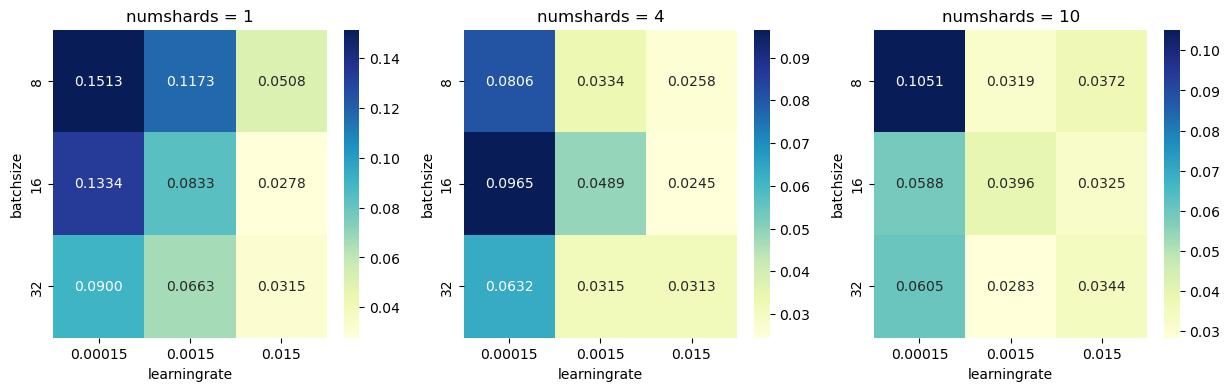

In [7]:
fig, axes = plt.subplots(1, len(numshards_values), figsize=(5*len(numshards_values), 4))

for ax, shards in zip(axes, numshards_values):
    pivot = df[df['numshards'] == shards].pivot_table(
        index='batchsize',
        columns='learningrate',
        values='meanmse',
        aggfunc='mean'
    )
    sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".4f", ax=ax)
    ax.set_title(f"numshards = {shards}")

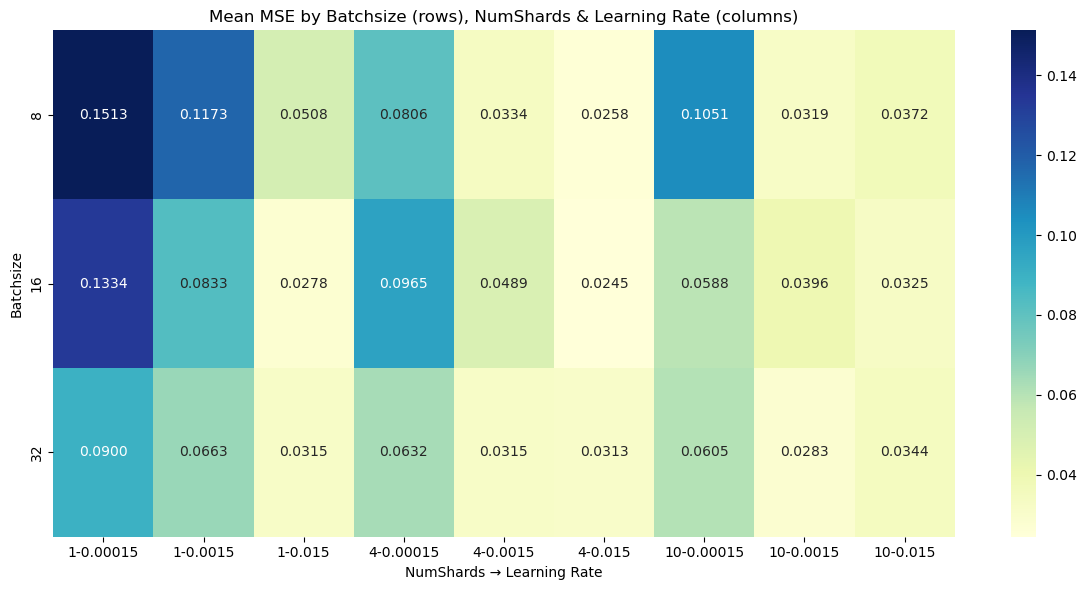

In [11]:
# Create pivot table with multi-index columns
pivot = df.pivot_table(
    index='batchsize',
    columns=['numshards', 'learningrate'],
    values='meanmse',
    aggfunc='mean'
)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".4f")

plt.title("Mean MSE by Batchsize (rows), NumShards & Learning Rate (columns)")
plt.ylabel("Batchsize")
plt.xlabel("NumShards → Learning Rate")
plt.tight_layout()
plt.show()


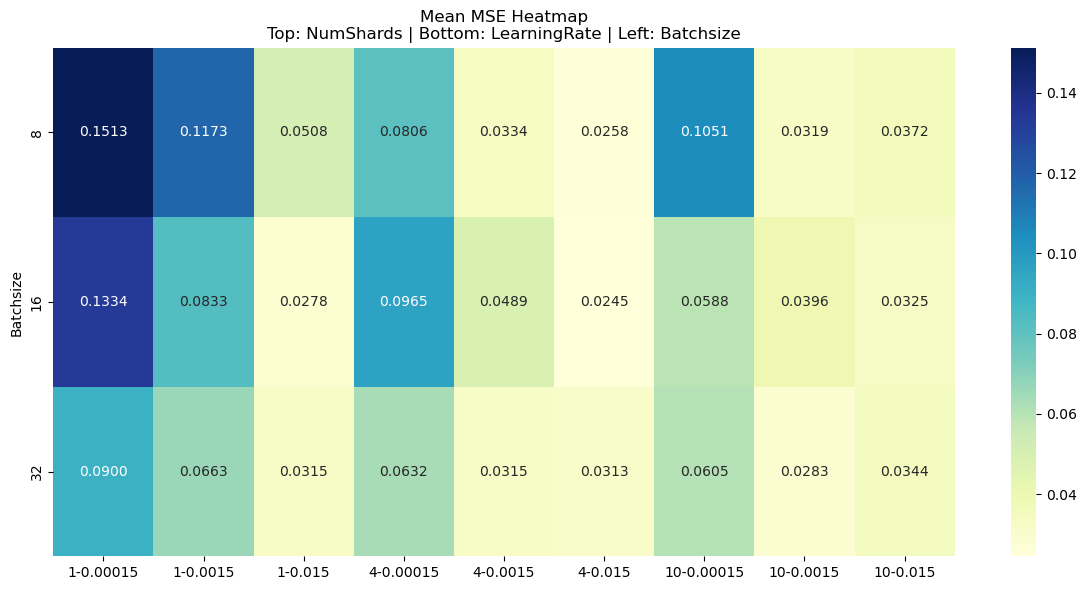

In [12]:


# Create pivot table with multi-index columns:
#   Top header = numshards
#   Sub-header = learningrate
pivot = df.pivot_table(
    index='batchsize',
    columns=['numshards', 'learningrate'],
    values='meanmse',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".4f")

# Titles & labels
plt.title("Mean MSE Heatmap\nTop: NumShards | Bottom: LearningRate | Left: Batchsize")
plt.ylabel("Batchsize")
plt.xlabel("")  # multi-index columns already have headers

# Display
plt.tight_layout()
plt.show()



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # to safely parse list strings

# Read CSV
file ="D:/MSc_RESEARCH/prototype/data/temp/training_output.csv"


In [13]:
data = []
with open(file, "r") as f:
    for line in f:
        # Remove whitespace/newline
        line = line.strip()
        # Split the line on '],[' pattern, which separates the two lists
        parts = line.split("],[")
        if len(parts) == 2:
            # Fix the first and second parts to be valid list strings
            original_str = parts[0] + "]" if not parts[0].endswith("]") else parts[0]
            reconstruction_str = "[" + parts[1] if not parts[1].startswith("[") else parts[1]
            # Now safely parse them
            original = ast.literal_eval(original_str)
            reconstruction = ast.literal_eval(reconstruction_str)
            data.append({"original": original, "reconstruction": reconstruction})



In [14]:
df = pd.DataFrame(data)

In [15]:
df

,original,reconstruction
0,"[0.6346566081047058, 0.5942431688308716, 0.142...","[0.6447721123695374, 0.5516121983528137, 0.463..."
1,"[0.15174150466918945, 0.7833833694458008, 0.61...","[0.6266855001449585, 0.7707632780075073, 0.088..."
2,"[0.8063244819641113, 1.0, 0.04727800190448761,...","[0.6340293884277344, 0.6577255725860596, 0.168..."
3,"[0.42575469613075256, 0.277498334646225, 0.992...","[0.3925967216491699, 0.40031319856643677, 0.71..."
4,"[0.9226735830307007, 0.4633333384990692, 0.216...","[0.2993137240409851, 0.2692442536354065, 0.674..."
...,...,...
6395,"[0.8187499642372131, 0.3732968270778656, 0.935...","[0.45846322178840637, 0.5622953772544861, 0.42..."
6396,"[0.9221697449684143, 0.6933800578117371, 0.215...","[0.4248487949371338, 0.5784624814987183, 0.409..."
6397,"[0.5796877145767212, 0.2888283431529999, 0.717...","[0.4297555387020111, 0.5795894265174866, 0.408..."
6398,"[0.9048961997032166, 0.5091903805732727, 0.527...","[0.46153977513313293, 0.5605636835098267, 0.43..."


In [16]:
import ast

def try_parse(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except Exception:
            print(f"Could not parse: {val}")
            return None
    else:
        return val

df["original"] = df["original"].apply(try_parse)
df["reconstruction"] = df["reconstruction"].apply(try_parse)


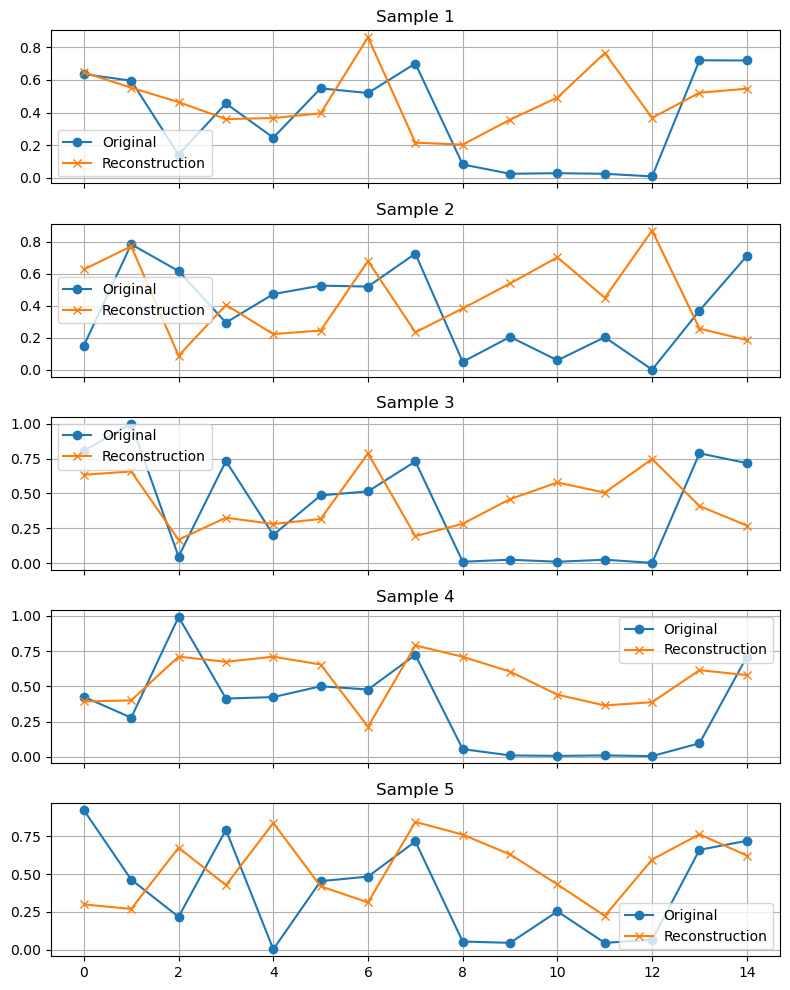

In [21]:


num_samples = min(5, len(df))  # Plot only first 5 samples

fig, axes = plt.subplots(num_samples, 1, figsize=(8, 2 * num_samples), sharex=True)

if num_samples == 1:
    axes = [axes]

for i in range(num_samples):
    ax = axes[i]
    ax.plot(df.loc[i, "original"], marker="o", label="Original")
    ax.plot(df.loc[i, "reconstruction"], marker="x", label="Reconstruction")
    ax.set_title(f"Sample {i+1}")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()
